In [7]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [8]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_12_4.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [9]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_12_4.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(180, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(180, activation = 'relu'),
    tf.keras.layers.Dense(180, activation = 'relu'),
    tf.keras.layers.Dense(180, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 100, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/100
100000/100000 - 3s - loss: 0.2931 - accuracy: 0.8821 - val_loss: 0.2582 - val_accuracy: 0.8929
Epoch 2/100
100000/100000 - 2s - loss: 0.2446 - accuracy: 0.8971 - val_loss: 0.2251 - val_accuracy: 0.9058
Epoch 3/100
100000/100000 - 2s - loss: 0.2114 - accuracy: 0.9093 - val_loss: 0.1947 - val_accuracy: 0.9160
Epoch 4/100
100000/100000 - 2s - loss: 0.1830 - accuracy: 0.9190 - val_loss: 0.1729 - val_accuracy: 0.9238
Epoch 5/100
100000/100000 - 2s - loss: 0.1639 - accuracy: 0.9257 - val_loss: 0.1589 - val_accuracy: 0.9280
Epoch 6/100
100000/100000 - 2s - loss: 0.1516 - accuracy: 0.9311 - val_loss: 0.1508 - val_accuracy: 0.9326
Epoch 7/100
100000/100000 - 2s - loss: 0.1399 - accuracy: 0.9366 - val_loss: 0.1415 - val_accuracy: 0.9358
Epoch 8/100
100000/100000 - 2s - loss: 0.1298 - accuracy: 0.9414 - val_loss: 0.1320 - val_accuracy: 0.9407
Epoch 9/100
100000/100000 - 2s - loss: 0.1222 - accuracy: 0.9453 - val_loss: 0.1233 - val_accu

Epoch 77/100
100000/100000 - 2s - loss: 0.0197 - accuracy: 0.9928 - val_loss: 0.0657 - val_accuracy: 0.9825
Epoch 78/100
100000/100000 - 2s - loss: 0.0169 - accuracy: 0.9938 - val_loss: 0.0748 - val_accuracy: 0.9804
Epoch 79/100
100000/100000 - 2s - loss: 0.0187 - accuracy: 0.9932 - val_loss: 0.0689 - val_accuracy: 0.9826
Epoch 80/100
100000/100000 - 2s - loss: 0.0177 - accuracy: 0.9935 - val_loss: 0.0745 - val_accuracy: 0.9812
Epoch 81/100
100000/100000 - 2s - loss: 0.0185 - accuracy: 0.9934 - val_loss: 0.0703 - val_accuracy: 0.9814
Epoch 82/100
100000/100000 - 2s - loss: 0.0157 - accuracy: 0.9943 - val_loss: 0.0718 - val_accuracy: 0.9819
Epoch 83/100
100000/100000 - 2s - loss: 0.0202 - accuracy: 0.9928 - val_loss: 0.0707 - val_accuracy: 0.9811
Epoch 84/100
100000/100000 - 2s - loss: 0.0194 - accuracy: 0.9930 - val_loss: 0.0705 - val_accuracy: 0.9815
Epoch 85/100
100000/100000 - 2s - loss: 0.0144 - accuracy: 0.9947 - val_loss: 0.0702 - val_accuracy: 0.9824
Epoch 86/100
100000/100000 -

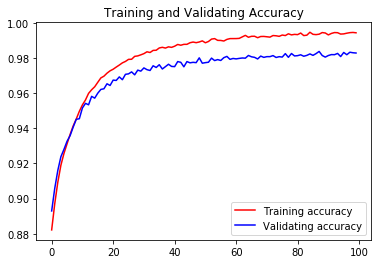

In [11]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [12]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_12_4_model.h5')